In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import uproot
import h5py

In [2]:
energy = 20
# output_name = "mc_data_1102/combined_"+str(energy)+"MeV_2.h5"
output_name = "mc_data_1103/combined_"+str(energy)+"MeV.h5"
out_vertex  = np.array([]).reshape(0,3)
out_pmtQ = np.array([]).reshape(0,120)
out_jade_vertex = np.array([]).reshape(0,3)
# for i in range(101):
for i in range(1):

#     ds_E = pd.read_csv("mc_data_1102/mcEvent_jsns2_"+str(energy)+"MeV_"+str(i)+".csv")
#     ds_P = pd.read_csv("mc_data_1102/mcPMT_jsns2_"+str(energy)+"MeV_"+str(i)+".csv")
    ds_E = pd.read_csv("mc_data/jsns2_0920_data/mcEvent_jsns2_0920_100k_"+str(energy)+"E_"+str(i+1)+".csv")
    ds_P = pd.read_csv("mc_data/jsns2_0920_data/mcPMT_jsns2_0920_100k_"+str(energy)+"E_"+str(i+1)+".csv")
    vertex = np.array(ds_E.iloc[:,-4:-1])
    pmtQ = np.array(ds_P.iloc[:,3:123])
    
#     path = "/store/hep/users/yewzzang/JSNS2/rat_mc_positron/positron_"+str(energy)+"MeV/jade/reco/Reco_positron_"+str(energy)+"MeV_"+str(i)+".root"
    path = "/users/wonsang1995/JADE_ver0/jade/MC_to_JADE/Reco/reco_jsns2_geo_100k_"+str(energy)+"E_"+str(i+1)+".root"
    f = uproot.open(path)

    test = f['recoTriggerTree']['recoTrigger/events/events.vertexReco'].array()

    for j in range(len(test)):

        if (np.array(test[j]).shape[0] == 1) & (np.abs(vertex[j][2])<1200):
            out_jade_vertex = np.concatenate((out_jade_vertex,np.array([np.array(test[j])[0][0],np.array(test[j])[0][1],np.array(test[j])[0][2]]).reshape(1,3)),axis = 0)
            out_vertex = np.concatenate((out_vertex,vertex[j].reshape(1,3)),axis = 0)
            out_pmtQ = np.concatenate((out_pmtQ,pmtQ[j].reshape(1,120)),axis = 0)


In [17]:
f['recoTriggerTree'].keys()

['recoTrigger',
 'recoTrigger/TObject',
 'recoTrigger/TObject/fUniqueID',
 'recoTrigger/TObject/fBits',
 'recoTrigger/events',
 'recoTrigger/events/events.fUniqueID',
 'recoTrigger/events/events.fBits',
 'recoTrigger/events/events.eventID',
 'recoTrigger/events/events.badEvent',
 'recoTrigger/events/events.vertexInitial',
 'recoTrigger/events/events.vertexReco',
 'recoTrigger/events/events.totalSolidAngleInitial',
 'recoTrigger/events/events.totalSolidAngleNS',
 'recoTrigger/events/events.fluxInitial',
 'recoTrigger/events/events.fluxNS',
 'recoTrigger/events/events.fluxReco',
 'recoTrigger/events/events.numFunctionCalls',
 'recoTrigger/events/events.numIterations',
 'recoTrigger/events/events.minValue',
 'recoTrigger/verboseLevel']

In [24]:
np.array(f['recoTriggerTree']['recoTrigger/events/events.eventID'])

array([array([], dtype=int32), array([], dtype=int32),
       array([], dtype=int32), ..., array([], dtype=int32),
       array([], dtype=int32), array([], dtype=int32)], dtype=object)

In [4]:


rInner = 3.160/2
hInner = 2.398/2
rOuter = 3.6/2
hOuter = 3.680/2

out_vertex[:,0] /= 1000
out_vertex[:,1] /= 1000
out_vertex[:,2] /= 1000
R2 = out_vertex[:,0]**2+out_vertex[:,1]**2



In [5]:
pos = pd.read_csv("/users/yewzzang/work/JSNS2_vertex/jsns_geometry_pos.csv")

In [6]:
x=np.array(pos)[:,0]
y=np.array(pos)[:,1]
z=np.array(pos)[:,2]

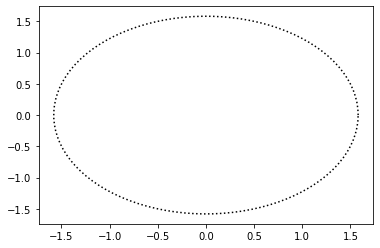

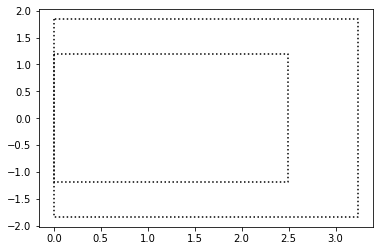

In [7]:

# plt.hist2d(out_vertex[:,0],out_vertex[:,1], bins=(50,50), range=([-2, 2], [-2, 2]), cmap=plt.cm.Reds)
plt.plot(out_vertex[:,0],out_vertex[:,1],'.r')
plt.plot(rInner*np.cos(np.linspace(0, 2*np.pi, 100)),
         rInner*np.sin(np.linspace(0, 2*np.pi, 100)), ':', color='k')
plt.show()

# plt.hist2d(ds.VertexR2, ds.VertexZ, bins=(50,50), range=([0, 4], [-2, 2]), cmap=plt.cm.Reds)
plt.plot(R2,out_vertex[:,2],'.r')
plt.plot([0, 0, rInner**2, rInner**2, 0],
         [hInner, -hInner, -hInner, hInner, hInner], ':', color='k')
plt.plot([0, 0, rOuter**2, rOuter**2, 0],
         [hOuter, -hOuter, -hOuter, hOuter, hOuter], ':', color='k')
plt.show()

#for i in range(1, 97):
#    #plt.plot(ds['Charge%d' % i], ds['Time%d' % i], '.')
#for i in range(1, 97):
#  plt.plot(ds.VertexX, ds['Charge%d' % i], '.')
#  #plt.plot(ds.VertexX, ds['Time%d' % i], '.')
#  plt.show()

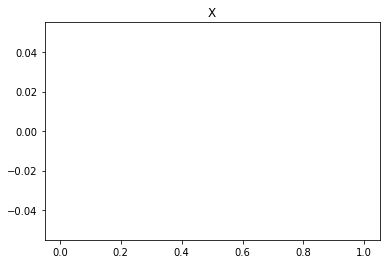

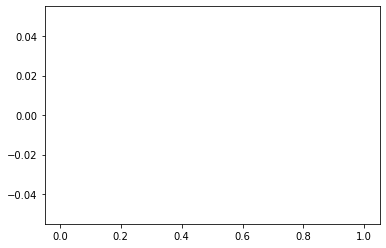

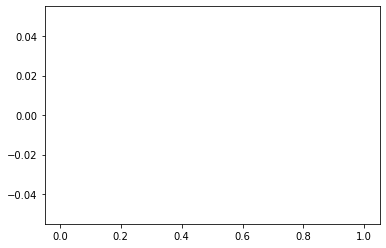

In [8]:
plt.hist(out_vertex[:,0],bins=100)
plt.title("X")
plt.show()
plt.hist(out_vertex[:,1],bins=100)
plt.show()
plt.hist(out_vertex[:,2],bins=100)
plt.show()

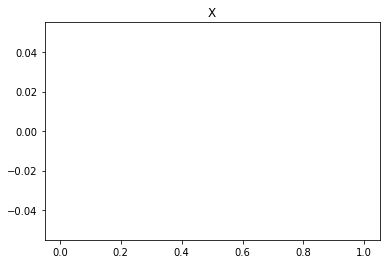

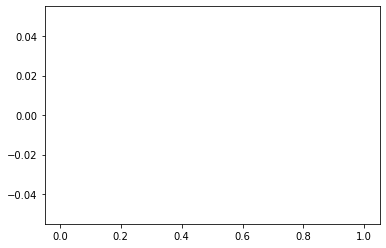

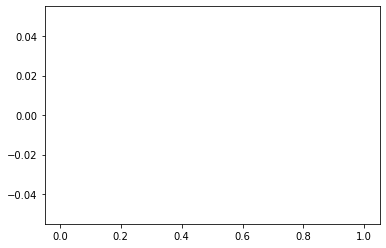

In [9]:
plt.hist(out_jade_vertex[:,0],bins=100)
plt.title("X")
plt.show()
plt.hist(out_jade_vertex[:,1],bins=100)
plt.show()
plt.hist(out_jade_vertex[:,2],bins=100)
plt.show()

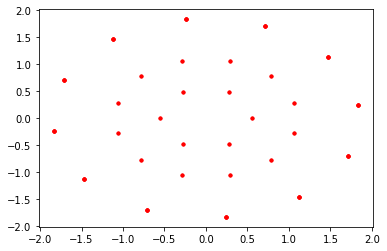

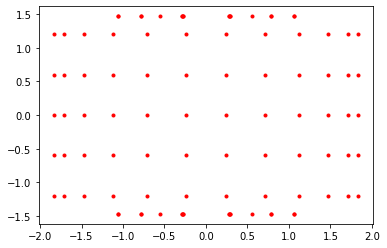

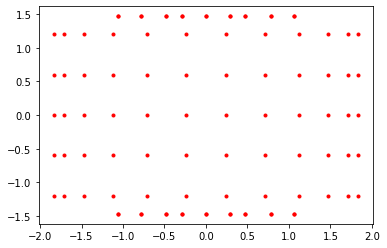

In [10]:

plt.plot(out_vertex[:,0],out_vertex[:,1],'.b')
plt.plot(x/1000,y/1000,'.r')
plt.show()

plt.plot(out_vertex[:,1],out_vertex[:,2],'.b')
plt.plot(x/1000,z/1000,'.r')
plt.show()

plt.plot(out_vertex[:,1],out_vertex[:,2],'.b')
plt.plot(y/1000,z/1000,'.r')
plt.show()


In [11]:

# kwargs = {'dtype':'f4', 'compression':'lzf'}
# #     with h5py.File(output_path, 'w', libver='latest', swmr=True) as fout:

# with h5py.File(output_name, 'w', libver='latest', swmr=True) as fout:
#     g = fout.create_group('events')
    
#     g.create_dataset('pmtQ', data=out_pmtQ, chunks=(1,120),**kwargs)
#     g.create_dataset('jade_vertex', data=out_jade_vertex, chunks=(1,3),**kwargs)
#     g.create_dataset('vertex', data=out_vertex, chunks=(1,3),**kwargs)

In [12]:
# dss.to_csv('jsns2_0920_100k_'+str(energy)+'E_mc.csv')

In [13]:
# ds[np.abs(ds['VertexZ']) < 1.2].to_csv('noselec_mc.csv')